## Digester
Un digester est une usine qui produit du papier ou carton à partir du bois.

### Description des données
Nom du fichier: `digester_data.csv`

Il y a environ un mois de données dans ce fichier (5968 lignes). 
Les données sont enregistrées toutes les 10 minutes.

Il y a 37 colonnes dans ce dataset. Ce sont toutes des mesures provenant de capteurs dans l'usine.  
La plus improtante est `Blow Kappa` qui mesure la qualité de la production.  
**L'objectif est de prédire ce `Blow Kappa` en utilisant les autres capteurs.**

In [1]:
import pandas
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
import numpy as np

import matplotlib.pyplot as plt


In [2]:
# Loading dataset

data = pandas.read_csv('digester_data.csv', index_col=0, parse_dates=True)
data.head()

,Wash Filtrate to Digester - Total Flow,Wash Filtrate Vertical Nozzle,White Liquor Flow to ITC,H-factor,H-factor Co-Current,H-factor Target,H-factor Counter-Current,Volumetric Chip Flow,Chip Mass Flow from Piles,Spruce Saw Mill Chips Share,...,Hot Spent Digester Liquor Specific Flow to Impregnation Vessel,Digester Production,Digester Long Level,Digester Chip Level Control,Digester Dilution Factor,Digester Short Level,Blow Kappa,Blow Temperature,Blow Production,Weak Black Liquor to Evaporation Plant Residual Alkali
Time,,,,,,,,,,,,,,,,,,,,,
2018-11-17 05:30:00,110.2245,99.17144,0.666082,654.5113,343.3514,640.0,311.1599,562.5585,28.57158,0.0,...,2.700000,900.7260,88.44555,18.03286,2.087241,48.00631,27.06810,81.31033,944.3789,9.08
2018-11-17 05:40:00,110.1122,98.94392,0.664136,661.8202,346.3676,640.0,315.4526,633.1141,32.40237,0.0,...,2.700000,901.0746,88.48584,16.11140,2.120218,48.22581,26.91316,81.29632,935.1744,9.08
2018-11-17 05:50:00,110.5644,99.35569,0.663386,641.0970,347.7459,640.0,293.3511,639.0107,32.13532,0.0,...,2.700000,901.1793,88.58454,19.01828,2.094056,48.28634,26.75613,81.33907,943.5457,9.08
2018-11-17 06:00:00,111.6846,100.51020,0.667563,636.6735,340.1161,640.0,296.5574,566.5072,28.39081,0.0,...,2.699660,901.0532,88.60841,19.94156,2.074880,48.21948,26.29543,81.32839,942.8271,9.08
2018-11-17 06:10:00,113.5258,101.86900,0.683108,648.1323,344.1459,640.0,303.9865,476.2530,24.19455,0.0,...,2.675004,930.5841,88.82150,16.25405,2.121525,48.34011,25.98184,81.47342,959.3496,9.08


In [3]:
# Building model
from sklearn.model_selection import train_test_split

# data['Blow Kappa'].plot(figsize=(20, 10))

dataframe = data

# qd = quarter day
# data.head()

dataframe['thirdday'] = data.index.hour // 1

feature_cols = ['Blow Kappa', 'thirdday']

# dataframe.plot(y='Blow Kappa', x='thirdday', figsize=(20, 10), kind='scatter')

y = dataframe['Blow Kappa']

X = dataframe.loc[:, dataframe.columns != 'Blow Kappa']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.3, train_size=0.7, shuffle=False)

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# print(X_train)



In [7]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)


svr = svr_lin.fit(X_train, y_train)


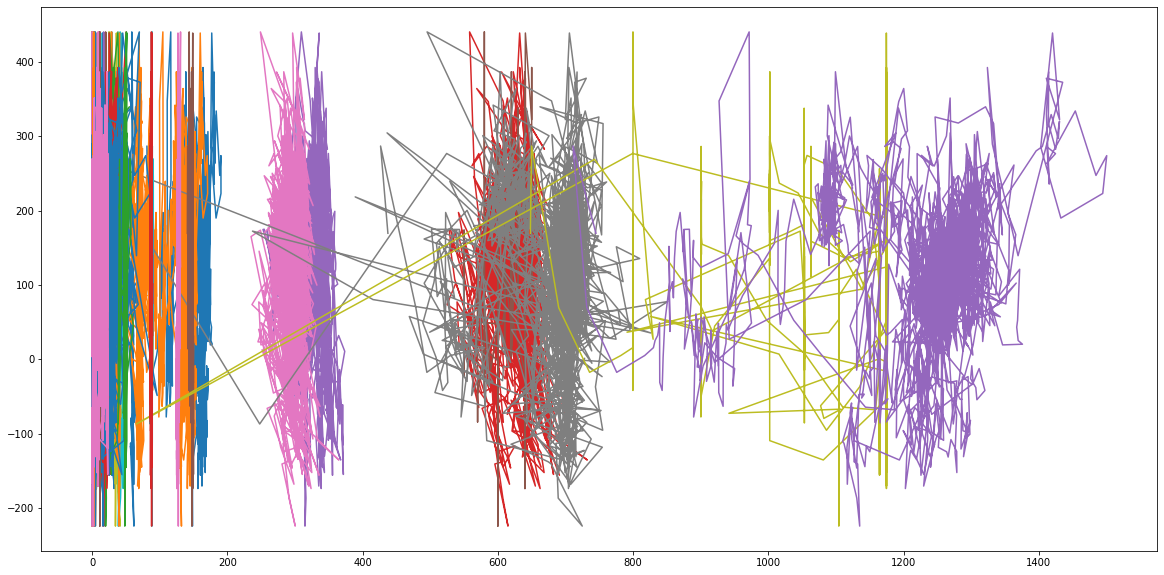

In [8]:
y_predict = svr.predict(X_test)

plt.figure(figsize=(20,10))
plt.plot(X_test, y_predict)
plt.show()